In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
economy = pd.read_csv('csgo/economy.csv', low_memory=False)
picks = pd.read_csv('csgo/picks.csv')
players = pd.read_csv('csgo/players.csv')
results = pd.read_csv('csgo/results.csv')

## Data Cleaning and Visualization

### Picks

In [3]:
picks.head()

,date,team_1,team_2,inverted_teams,match_id,event_id,best_of,system,t1_removed_1,t1_removed_2,t1_removed_3,t2_removed_1,t2_removed_2,t2_removed_3,t1_picked_1,t2_picked_1,left_over
0,2020-03-18,TeamOne,Recon 5,1,2340454,5151,3,123412,Vertigo,Train,0.0,Nuke,Overpass,0.0,Dust2,Inferno,Mirage
1,2020-03-18,Rugratz,Bad News Bears,0,2340453,5151,3,123412,Dust2,Nuke,0.0,Mirage,Train,0.0,Vertigo,Inferno,Overpass
2,2020-03-18,New England Whalers,Station7,0,2340461,5243,1,121212,Mirage,Dust2,Vertigo,Nuke,Train,Overpass,0.0,0.0,Inferno
3,2020-03-17,Complexity,forZe,1,2340279,5226,3,123412,Inferno,Nuke,0.0,Overpass,Vertigo,0.0,Dust2,Train,Mirage
4,2020-03-17,Singularity,Endpoint,0,2340456,5247,3,123412,Train,Mirage,0.0,Nuke,Inferno,0.0,Overpass,Vertigo,Dust2


In [4]:
picks['date'] = pd.to_datetime(picks['date'])

In [5]:
picks['best_of'].value_counts()

3            10142
1             5656
2              224
of               3
3.               3
3(LAN)           3
1(Online)        2
2(Online)        1
3(Online)        1
Name: best_of, dtype: int64

We only want to consider best of 3 matches as they are the most commonly played in important tournaments 

In [6]:
picks.at[picks['best_of'] ==  '3.', 'best_of'] = '3'
picks.at[picks['best_of'] ==  'of', 'best_of'] = '3'
picks.at[picks['best_of'] ==  '3(LAN)', 'best_of'] = '3'
picks.at[picks['best_of'] ==  '3(Online)', 'best_of'] = '3'

In [7]:
picks = picks[picks['best_of'] == '3']
picks.drop(['best_of', 't1_removed_3', 't2_removed_3', 'inverted_teams', 'system'], axis=1, inplace=True)

In [8]:
picks.head()

,date,team_1,team_2,match_id,event_id,t1_removed_1,t1_removed_2,t2_removed_1,t2_removed_2,t1_picked_1,t2_picked_1,left_over
0,2020-03-18,TeamOne,Recon 5,2340454,5151,Vertigo,Train,Nuke,Overpass,Dust2,Inferno,Mirage
1,2020-03-18,Rugratz,Bad News Bears,2340453,5151,Dust2,Nuke,Mirage,Train,Vertigo,Inferno,Overpass
3,2020-03-17,Complexity,forZe,2340279,5226,Inferno,Nuke,Overpass,Vertigo,Dust2,Train,Mirage
4,2020-03-17,Singularity,Endpoint,2340456,5247,Train,Mirage,Nuke,Inferno,Overpass,Vertigo,Dust2
5,2020-03-17,BIG,fnatic,2340397,5226,Train,Dust2,Nuke,Vertigo,Inferno,Overpass,Mirage


find out most picked maps

In [9]:
picks['t1_picked_1'].value_counts()

Mirage         1958
Inferno        1711
Train          1361
Overpass       1330
Nuke           1093
Dust2           960
Cache           902
Cobblestone     587
Vertigo         225
0.0              25
Name: t1_picked_1, dtype: int64

In [10]:
picks = picks.drop(picks[picks['t1_picked_1'] == '0.0'].index)

In [11]:
picks['t2_picked_1'].value_counts()

Mirage         1938
Inferno        1727
Train          1462
Overpass       1328
Nuke           1135
Dust2           980
Cache           817
Cobblestone     523
Vertigo         210
0.0               6
left)             1
Name: t2_picked_1, dtype: int64

In [12]:
picks = picks.drop(picks[picks['t2_picked_1'] == '0.0'].index)
picks = picks.drop(picks[picks['t2_picked_1'] == 'left)'].index)

In [13]:
picks['left_over'].value_counts()

Mirage         1872
Inferno        1823
Train          1753
Overpass       1188
Dust2          1026
Nuke            903
Cache           830
Cobblestone     563
Vertigo         149
Gorilla           1
Luminosity        1
BLITZKRIEG        1
Royal             1
Alma              1
MK                1
Envy              1
Brute             1
ENCE              1
Big               1
Ripple            1
Vega              1
Grayhound         1
Name: left_over, dtype: int64

In [14]:
maps = ['Mirage', 'Inferno', 'Train', 'Overpass', 'Dust2', 'Nuke', 'Cache', 'Cobblestone', 'Vertigo']
picks = picks.drop(picks[~picks['left_over'].isin(maps)].index)

In [15]:
picks.head()

,date,team_1,team_2,match_id,event_id,t1_removed_1,t1_removed_2,t2_removed_1,t2_removed_2,t1_picked_1,t2_picked_1,left_over
0,2020-03-18,TeamOne,Recon 5,2340454,5151,Vertigo,Train,Nuke,Overpass,Dust2,Inferno,Mirage
1,2020-03-18,Rugratz,Bad News Bears,2340453,5151,Dust2,Nuke,Mirage,Train,Vertigo,Inferno,Overpass
3,2020-03-17,Complexity,forZe,2340279,5226,Inferno,Nuke,Overpass,Vertigo,Dust2,Train,Mirage
4,2020-03-17,Singularity,Endpoint,2340456,5247,Train,Mirage,Nuke,Inferno,Overpass,Vertigo,Dust2
5,2020-03-17,BIG,fnatic,2340397,5226,Train,Dust2,Nuke,Vertigo,Inferno,Overpass,Mirage


#### Note that even there there are 9 maps listed here, competitive CS:GO's map pool is set at 7 at a given time. Cache and Cobblestone were replaced with Nuke and Vertigo at seperate times.

#### In a best of 3 match the map pick/veto system is as follows: <br> <br> Team 1 Veto, <br> Team 2 Veto, <br> <br> Team 1 Pick, <br> Team 2 Pick, <br> <br> Team 1 Veto, <br> Team 2 Veto, <br> <br> Final Map Left Over 

The map pick/veto system is not consistently in this order, however it is the common system used.

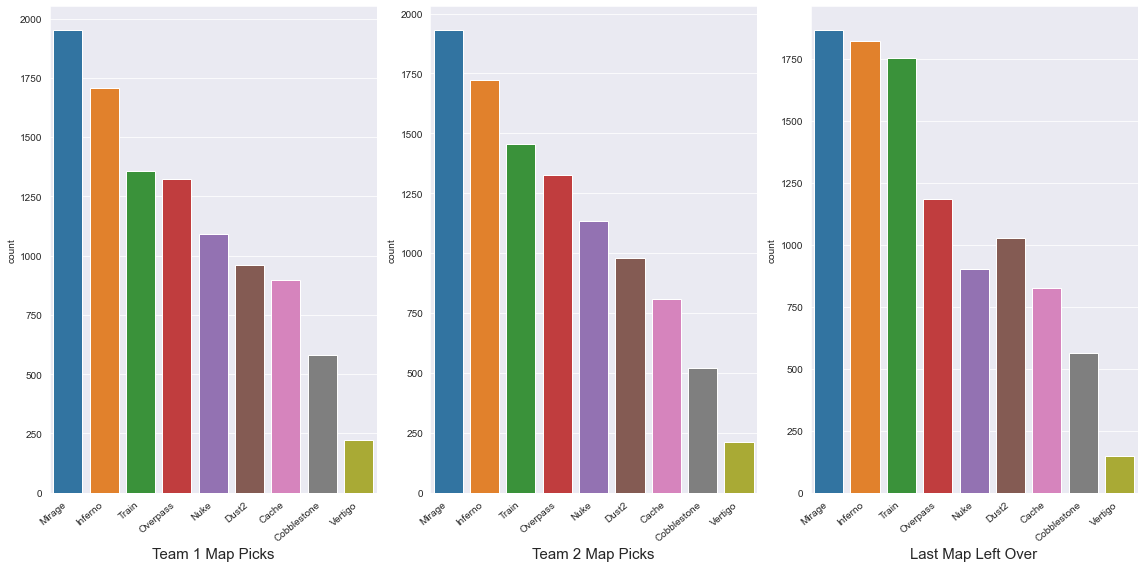

In [38]:
maps = ['Mirage', 'Inferno', 'Train', 'Overpass', 'Nuke', 'Dust2', 'Cache', 'Cobblestone', 'Vertigo']
sns.set_style('darkgrid')
f, ax = plt.subplots(1,3,figsize=(16,8))

sns.countplot(x='t1_picked_1', data=picks, ax=ax[0], order=maps)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=40, ha="right")
ax[0].set_xlabel('Team 1 Map Picks', fontsize=15)

sns.countplot(x='t2_picked_1', data=picks, ax=ax[1], order=maps)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=40, ha="right")
ax[1].set_xlabel('Team 2 Map Picks', fontsize=15)

sns.countplot(x='left_over', data=picks, ax=ax[2], order=maps)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=40, ha="right")
ax[2].set_xlabel('Last Map Left Over', fontsize=15)
plt.tight_layout()

The two different sides a team can be on has no effect on what map is picked and the left over map has only a slight difference where Dust2 and Nuke are switched

Now to look at the map bans and see the frequency of the maps that have been banned in the 1st and 2nd rotations

In [17]:
print(picks['t1_removed_1'].value_counts())
print('')
print(picks['t1_removed_2'].value_counts())

Nuke           2195
Overpass       1571
Train          1275
Cache          1059
Inferno         898
Dust2           890
Vertigo         849
Mirage          834
Cobblestone     536
Name: t1_removed_1, dtype: int64

Overpass       1603
Train          1529
Nuke           1336
Mirage         1210
Inferno        1197
Dust2          1145
Cache          1075
Cobblestone     510
Vertigo         492
0.0              10
Name: t1_removed_2, dtype: int64


In [18]:
print(picks['t2_removed_1'].value_counts())
print('')
print(picks['t2_removed_2'].value_counts())

Nuke           2187
Overpass       1550
Train          1222
Cache          1212
Dust2           875
Mirage          865
Vertigo         817
Inferno         809
Cobblestone     569
0.0               1
Name: t2_removed_1, dtype: int64

Overpass       1540
Train          1505
Mirage         1434
Nuke           1243
Inferno        1232
Dust2          1108
Cache          1027
Cobblestone     564
Vertigo         449
0.0               5
Name: t2_removed_2, dtype: int64


In [19]:
picks = picks.drop(picks[picks['t1_removed_2'] == '0.0'].index)
picks = picks.drop(picks[picks['t2_removed_1'] == '0.0'].index)
picks = picks.drop(picks[picks['t2_removed_2'] == '0.0'].index)

[Text(0, 0, 'First Veto'), Text(1, 0, 'Second Veto')]

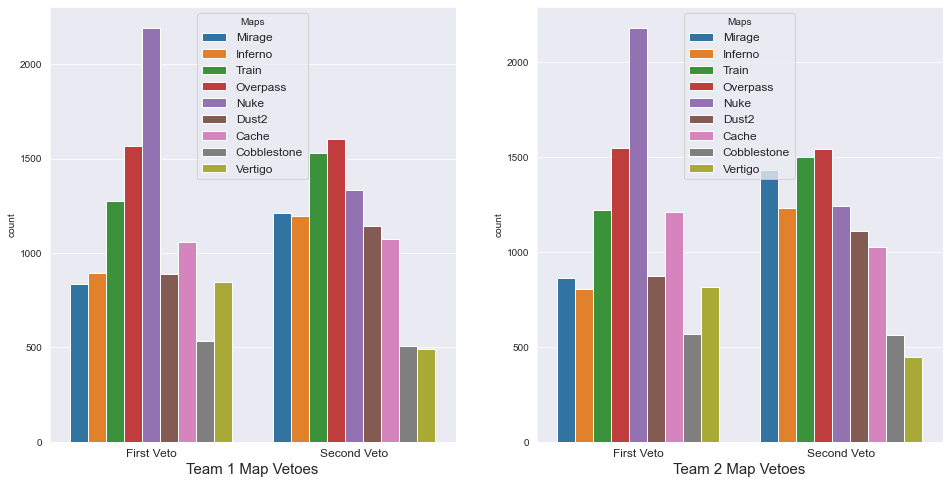

In [20]:
maps = ['Mirage', 'Inferno', 'Train', 'Overpass', 'Nuke', 'Dust2', 'Cache', 'Cobblestone', 'Vertigo']
f, ax = plt.subplots(1,2,figsize=(16,8))
melt_df_1 = picks[['t1_removed_1', 't1_removed_2']]
melt_df_2 = picks[['t2_removed_1', 't2_removed_2']]

sns.countplot(x='variable', hue='value', data=pd.melt(melt_df_1), ax=ax[0], hue_order=maps)
ax[0].set_xlabel('Team 1 Map Vetoes', fontsize=15)
ax[0].legend(title='Maps', fontsize=12)
ax[0].set_xticklabels(['First Veto', 'Second Veto'], fontsize=12)

sns.countplot(x='variable', hue='value', data=pd.melt(melt_df_2), ax=ax[1], hue_order=maps)
ax[1].set_xlabel('Team 2 Map Vetoes', fontsize=15)
ax[1].legend(loc='upper center', title='Maps', fontsize=12)
ax[1].set_xticklabels(['First Veto', 'Second Veto'], fontsize=12)

From this plot we can see that in each rotation of the vetoes both teams have very similar picks and that the maps vetoed in each stage do differ, which may have to do with what maps were vetoed 
and picked in the first rotations of vetoes and picks.

In [21]:
picks.head()

,date,team_1,team_2,match_id,event_id,t1_removed_1,t1_removed_2,t2_removed_1,t2_removed_2,t1_picked_1,t2_picked_1,left_over
0,2020-03-18,TeamOne,Recon 5,2340454,5151,Vertigo,Train,Nuke,Overpass,Dust2,Inferno,Mirage
1,2020-03-18,Rugratz,Bad News Bears,2340453,5151,Dust2,Nuke,Mirage,Train,Vertigo,Inferno,Overpass
3,2020-03-17,Complexity,forZe,2340279,5226,Inferno,Nuke,Overpass,Vertigo,Dust2,Train,Mirage
4,2020-03-17,Singularity,Endpoint,2340456,5247,Train,Mirage,Nuke,Inferno,Overpass,Vertigo,Dust2
5,2020-03-17,BIG,fnatic,2340397,5226,Train,Dust2,Nuke,Vertigo,Inferno,Overpass,Mirage


In [22]:
picks[picks['t1_removed_1'] == 'Nuke']['t2_removed_1'].value_counts()

Overpass       435
Cache          412
Train          326
Mirage         226
Dust2          221
Inferno        215
Vertigo        180
Cobblestone    178
Name: t2_removed_1, dtype: int64

Text(0.5, 0, 'Team 1 Map Picks')

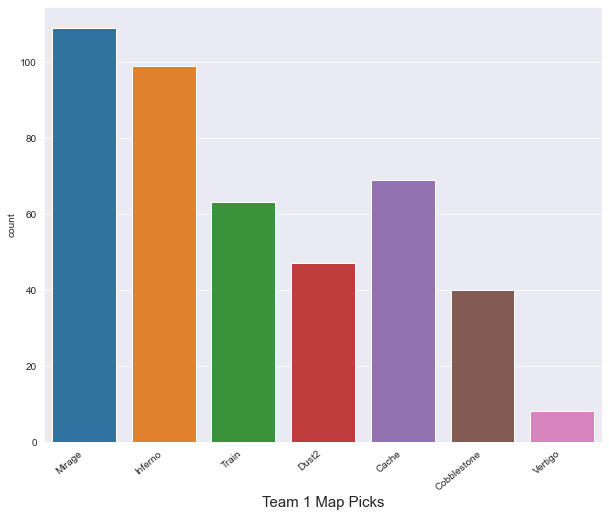

In [306]:
maps = ['Mirage', 'Inferno', 'Train', 'Dust2', 'Cache', 'Cobblestone', 'Vertigo']
sns.set_style('darkgrid')
df = picks[(picks['t1_removed_1'] == 'Nuke') & (picks['t2_removed_1'] == 'Overpass')]

f, ax = plt.subplots(figsize=(10,8))

sns.countplot(x='t1_picked_1', data=df, ax=ax, order=maps)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel('Team 1 Map Picks', fontsize=15)

Some takeaways from these visualizations:
- Mirage and Inferno are the most played maps and most popular map picks from 2016-2020, with Train and Overpass close behind.
- Nuke is by far the most popular first rotation map veto for either team. 
- Dust2, Cache, Cobblestone, and Vertigo underperform in map picks/vetoes since they were not consistently included in the map pools of the tournaments that ran from 2016-2020.
- In the case of Vertigo, which was only added in 2019, we will look closer to the matches played from its introduction to where the data ends.

In [44]:
# Find the first date which Vertigo appears as a map veto, pick, or left over
picks[picks.isin(['Vertigo']).any(axis=1)]['date'].tail(1)

4712   2019-04-02
Name: date, dtype: datetime64[ns]

In [45]:
vertigo_df = picks[picks['date'] >= '2019-04-02']

In [52]:
vertigo_df.head()

,date,team_1,team_2,match_id,event_id,t1_removed_1,t1_removed_2,t2_removed_1,t2_removed_2,t1_picked_1,t2_picked_1,left_over
0,2020-03-18,TeamOne,Recon 5,2340454,5151,Vertigo,Train,Nuke,Overpass,Dust2,Inferno,Mirage
1,2020-03-18,Rugratz,Bad News Bears,2340453,5151,Dust2,Nuke,Mirage,Train,Vertigo,Inferno,Overpass
3,2020-03-17,Complexity,forZe,2340279,5226,Inferno,Nuke,Overpass,Vertigo,Dust2,Train,Mirage
4,2020-03-17,Singularity,Endpoint,2340456,5247,Train,Mirage,Nuke,Inferno,Overpass,Vertigo,Dust2
5,2020-03-17,BIG,fnatic,2340397,5226,Train,Dust2,Nuke,Vertigo,Inferno,Overpass,Mirage


In [53]:
vertigo_df[vertigo_df.isin(['Cobblestone']).any(axis=1)]

,date,team_1,team_2,match_id,event_id,t1_removed_1,t1_removed_2,t2_removed_1,t2_removed_2,t1_picked_1,t2_picked_1,left_over


Cobblestone has stopped being played at this point so we can remove it from the maps considered in the visualizations

In [58]:
vertigo_df['t1_picked_1'].value_counts()

Inferno     633
Mirage      602
Nuke        533
Dust2       513
Overpass    492
Train       448
Vertigo     224
Cache        17
Name: t1_picked_1, dtype: int64

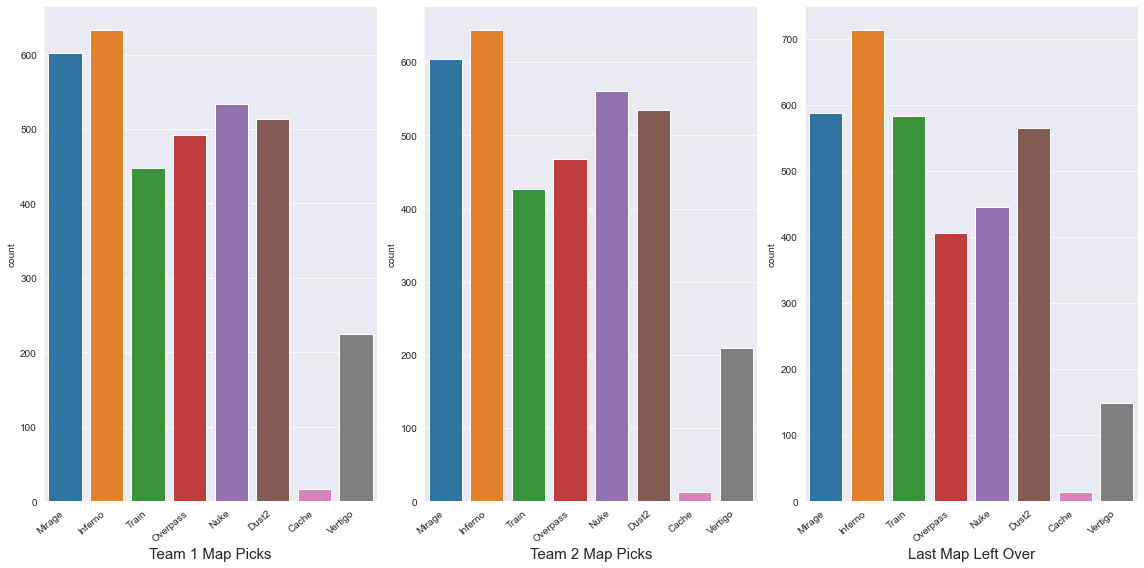

In [54]:
maps = ['Mirage', 'Inferno', 'Train', 'Overpass', 'Nuke', 'Dust2', 'Cache', 'Vertigo']
f, ax = plt.subplots(1,3,figsize=(16,8))

sns.countplot(x='t1_picked_1', data=vertigo_df, ax=ax[0], order=maps)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=40, ha="right")
ax[0].set_xlabel('Team 1 Map Picks', fontsize=15)

sns.countplot(x='t2_picked_1', data=vertigo_df, ax=ax[1], order=maps)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=40, ha="right")
ax[1].set_xlabel('Team 2 Map Picks', fontsize=15)

sns.countplot(x='left_over', data=vertigo_df, ax=ax[2], order=maps)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=40, ha="right")
ax[2].set_xlabel('Last Map Left Over', fontsize=15)
plt.tight_layout()

[Text(0, 0, 'First Veto'), Text(1, 0, 'Second Veto')]

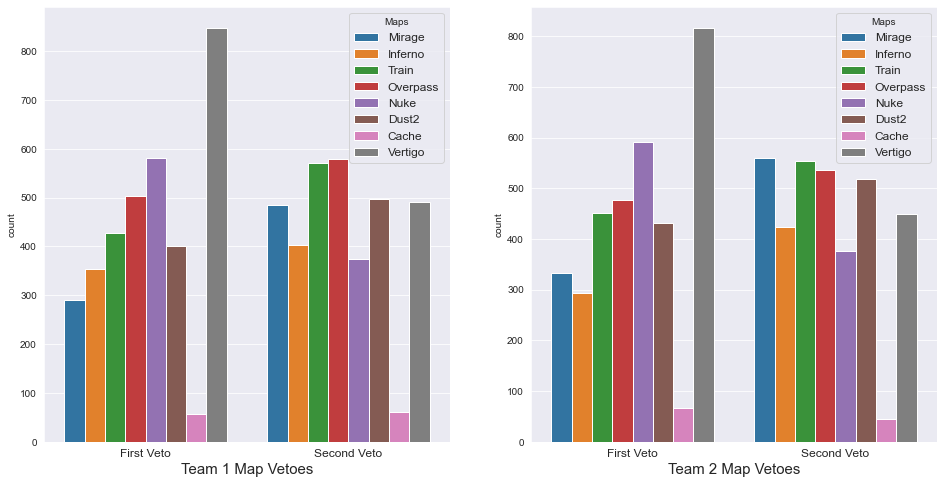

In [60]:
maps = ['Mirage', 'Inferno', 'Train', 'Overpass', 'Nuke', 'Dust2', 'Cache', 'Vertigo']
f, ax = plt.subplots(1,2,figsize=(16,8))
melt_df_1 = vertigo_df[['t1_removed_1', 't1_removed_2']]
melt_df_2 = vertigo_df[['t2_removed_1', 't2_removed_2']]

sns.countplot(x='variable', hue='value', data=pd.melt(melt_df_1), ax=ax[0], hue_order=maps)
ax[0].set_xlabel('Team 1 Map Vetoes', fontsize=15)
ax[0].legend(title='Maps', fontsize=12)
ax[0].set_xticklabels(['First Veto', 'Second Veto'], fontsize=12)

sns.countplot(x='variable', hue='value', data=pd.melt(melt_df_2), ax=ax[1], hue_order=maps)
ax[1].set_xlabel('Team 2 Map Vetoes', fontsize=15)
ax[1].legend(title='Maps', fontsize=12)
ax[1].set_xticklabels(['First Veto', 'Second Veto'], fontsize=12)

Once we only look at data once Vertigo is introduced the tendancies of map vetoes changes and Vertigo becomes the most popular map veto, while Nuke is still second most popular.

In [93]:
picks_2016 = picks[picks['date'].dt.year == 2016]
picks_2017 = picks[picks['date'].dt.year == 2017]
picks_2018 = picks[picks['date'].dt.year == 2018]
picks_2019 = picks[picks['date'].dt.year == 2019]
picks_2020 = picks[picks['date'].dt.year == 2020]

In [127]:
dict_2016 = dict(picks_2016['t1_picked_1'].value_counts())
dict_2017 = dict(picks_2017['t1_picked_1'].value_counts())
dict_2018 = dict(picks_2018['t1_picked_1'].value_counts())
dict_2019 = dict(picks_2019['t1_picked_1'].value_counts())
dict_2020 = dict(picks_2020['t1_picked_1'].value_counts())

In [125]:
dict(picks_2017['t1_picked_1'].value_counts())

{'Mirage': 460,
 'Inferno': 344,
 'Train': 338,
 'Cobblestone': 335,
 'Cache': 332,
 'Overpass': 284,
 'Nuke': 181,
 'Dust2': 16}

In [128]:
maps = ['Mirage', 'Inferno', 'Train', 'Overpass', 'Nuke', 'Dust2', 'Cache', 'Cobblestone', 'Vertigo']
pd.DataFrame([dict_2016, dict_2017, dict_2018, dict_2019, dict_2020], columns=maps, index=[2016, 2017, 2018, 2019, 2020])

,Mirage,Inferno,Train,Overpass,Nuke,Dust2,Cache,Cobblestone,Vertigo
2016,107,2,86,54,47,91,95.0,101.0,NaN
2017,460,344,338,284,181,16,332.0,335.0,NaN
2018,672,613,409,409,262,246,391.0,146.0,NaN
2019,620,644,440,507,519,514,78.0,NaN,171.0
2020,95,104,83,70,81,92,NaN,NaN,53.0


Final takeaways from the picks dataset:
- In 2019 and 2020 Vertigo dominates the first map veto, this is because it was a new map introduced into the map pool and teams generally did not want to play on it.
- Note that the data from 2020 is only up until March, otherwise the bulk of the games played were between 2017 and the end of the dataset March 2020.
- Mirage and Inferno seem to be the most favoured maps that the teams want to play on.

### Results

In [18]:
results.head()

,date,team_1,team_2,_map,result_1,result_2,map_winner,starting_ct,ct_1,t_2,t_1,ct_2,event_id,match_id,rank_1,rank_2,map_wins_1,map_wins_2,match_winner
0,2020-03-18,Recon 5,TeamOne,Dust2,0,16,2,2,0,1,0,15,5151,2340454,62,63,0,2,2
1,2020-03-18,Recon 5,TeamOne,Inferno,13,16,2,2,8,6,5,10,5151,2340454,62,63,0,2,2
2,2020-03-18,New England Whalers,Station7,Inferno,12,16,2,1,9,6,3,10,5243,2340461,140,118,12,16,2
3,2020-03-18,Rugratz,Bad News Bears,Inferno,7,16,2,2,0,8,7,8,5151,2340453,61,38,0,2,2
4,2020-03-18,Rugratz,Bad News Bears,Vertigo,8,16,2,2,4,5,4,11,5151,2340453,61,38,0,2,2


In [101]:
players['best_of'].value_counts()

1    185254
3    178728
2     15650
5      3685
Name: best_of, dtype: int64

In [19]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45773 entries, 0 to 45772
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          45773 non-null  object
 1   team_1        45773 non-null  object
 2   team_2        45773 non-null  object
 3   _map          45773 non-null  object
 4   result_1      45773 non-null  int64 
 5   result_2      45773 non-null  int64 
 6   map_winner    45773 non-null  int64 
 7   starting_ct   45773 non-null  int64 
 8   ct_1          45773 non-null  int64 
 9   t_2           45773 non-null  int64 
 10  t_1           45773 non-null  int64 
 11  ct_2          45773 non-null  int64 
 12  event_id      45773 non-null  int64 
 13  match_id      45773 non-null  int64 
 14  rank_1        45773 non-null  int64 
 15  rank_2        45773 non-null  int64 
 16  map_wins_1    45773 non-null  int64 
 17  map_wins_2    45773 non-null  int64 
 18  match_winner  45773 non-null  int64 
dtypes: i

In [20]:
results = pd.read_csv('csgo/results.csv')

In [21]:
results['date'] = pd.to_datetime(results['date'])

In [22]:
results.drop(['map_wins_1', 'map_wins_2', 'rank_1', 'rank_2'], axis=1, inplace=True)

In [23]:
results.rename(columns={'_map': 'map', 'result_1': 'score_1', 'result_2': 'score_2', 
                       'ct_1': 'ct_score_1', 'ct_2': 'ct_score_2', 't_1': 't_score_1',
                       't_2': 't_score_2'}, inplace=True)

In [24]:
results.head()

,date,team_1,team_2,map,score_1,score_2,map_winner,starting_ct,ct_score_1,t_score_2,t_score_1,ct_score_2,event_id,match_id,match_winner
0,2020-03-18,Recon 5,TeamOne,Dust2,0,16,2,2,0,1,0,15,5151,2340454,2
1,2020-03-18,Recon 5,TeamOne,Inferno,13,16,2,2,8,6,5,10,5151,2340454,2
2,2020-03-18,New England Whalers,Station7,Inferno,12,16,2,1,9,6,3,10,5243,2340461,2
3,2020-03-18,Rugratz,Bad News Bears,Inferno,7,16,2,2,0,8,7,8,5151,2340453,2
4,2020-03-18,Rugratz,Bad News Bears,Vertigo,8,16,2,2,4,5,4,11,5151,2340453,2


Find out Astralis' win rate on each map

In [25]:
results[(results['team_1'] == 'Astralis') | (results['team_2'] == 'Astralis')]
# Astralis have played 872 maps between 2015-2020

,date,team_1,team_2,map,score_1,score_2,map_winner,starting_ct,ct_score_1,t_score_2,t_score_1,ct_score_2,event_id,match_id,match_winner
47,2020-03-16,Astralis,NiP,Overpass,8,16,2,2,4,5,4,11,5226,2340065,2
49,2020-03-16,Astralis,NiP,Vertigo,6,16,2,1,3,12,3,4,5226,2340065,2
676,2020-02-29,Natus Vincere,Astralis,Nuke,16,5,1,1,13,2,3,3,4901,2339401,1
677,2020-02-29,Natus Vincere,Astralis,Dust2,16,5,1,2,2,4,14,1,4901,2339401,1
713,2020-02-27,Astralis,fnatic,Vertigo,16,8,1,2,7,2,9,6,4901,2339394,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45266,2016-02-05,G2,Astralis,Cache,15,19,2,2,8,7,7,8,2013,2300594,2
45352,2016-01-23,Astralis,Luminosity,Train,8,16,2,1,7,8,1,8,1977,2300439,2
45353,2016-01-23,Astralis,Luminosity,Overpass,12,16,2,1,6,9,6,7,1977,2300439,2
45362,2016-01-22,Astralis,Dignitas,Overpass,16,9,1,2,5,5,11,4,1977,2300414,1


In [85]:
astralis_results = results[(results['team_1'] == 'Astralis') | (results['team_2'] == 'Astralis')]

In [76]:
astralis_results['map'].value_counts()

Inferno        173
Overpass       153
Train          131
Mirage         129
Nuke           110
Dust2           99
Cache           54
Vertigo         14
Cobblestone      9
Name: map, dtype: int64

In [81]:
def win_rate_per_map(team: str):
    assert (team in results['team_1'].unique() or team in results['team_2'].unique())
    team_df = results[(results['team_1'] == team) | (results['team_2'] == team)]
    
    win_count = {'Inferno': 0, 'Overpass': 0, 'Train': 0, 'Mirage': 0, 'Nuke': 0, 'Dust2': 0, 'Cache': 0,
            'Vertigo': 0, 'Cobblestone': 0}
    map_count = {'Inferno': 0, 'Overpass': 0, 'Train': 0, 'Mirage': 0, 'Nuke': 0, 'Dust2': 0, 'Cache': 0,
            'Vertigo': 0, 'Cobblestone': 0}
    maps_played = 0
    
    for index, row in team_df.iterrows():
        if row['team_1'] == team:
            team_df = 1
        else:
            team_df = 2
        current_map = row['map']
        if row['map_winner'] == team_df:
            win_count[current_map] += 1
        maps_played += 1
        map_count[current_map] += 1
    
    map_winrate = {key: np.round(value/map_count[key], 4) for key, value in win_count.items()}
    
    return pd.DataFrame([map_winrate, win_count, map_count], index=['Win Rate', 'Win Count','Map Count']).transpose()

In [82]:
win_rate_per_map('Astralis')

,Win Rate,Win Count,Map Count
Inferno,0.7514,130.0,173.0
Overpass,0.6667,102.0,153.0
Train,0.6565,86.0,131.0
Mirage,0.6899,89.0,129.0
Nuke,0.7545,83.0,110.0
Dust2,0.6364,63.0,99.0
Cache,0.5926,32.0,54.0
Vertigo,0.7143,10.0,14.0
Cobblestone,0.1111,1.0,9.0


In [86]:
def games_won(df):
    if df['team_1'] == 'Astralis':
        team_side = 1
    else:
        team_side = 2
    if df['map_winner'] == team_side:
        return 1
    else:
        return 0
    
astralis_results['game_won'] = astralis_results.apply(games_won, axis=1)
astralis_results['game_won'].value_counts()

<ipython-input-86-32c86054b210>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  astralis_results['game_won'] = astralis_results.apply(games_won, axis=1)


1    596
0    276
Name: game_won, dtype: int64

In [89]:
astralis_results.head()

,date,team_1,team_2,map,score_1,score_2,map_winner,starting_ct,ct_score_1,t_score_2,t_score_1,ct_score_2,event_id,match_id,match_winner,game_won
47,2020-03-16,Astralis,NiP,Overpass,8,16,2,2,4,5,4,11,5226,2340065,2,0
49,2020-03-16,Astralis,NiP,Vertigo,6,16,2,1,3,12,3,4,5226,2340065,2,0
676,2020-02-29,Natus Vincere,Astralis,Nuke,16,5,1,1,13,2,3,3,4901,2339401,1,0
677,2020-02-29,Natus Vincere,Astralis,Dust2,16,5,1,2,2,4,14,1,4901,2339401,1,0
713,2020-02-27,Astralis,fnatic,Vertigo,16,8,1,2,7,2,9,6,4901,2339394,1,1


In [99]:
pd.set_option('display.max_columns', None)
players.head()

,date,player_name,team,opponent,country,player_id,match_id,event_id,event_name,best_of,map_1,map_2,map_3,kills,assists,deaths,hs,flash_assists,kast,kddiff,adr,fkdiff,rating,m1_kills,m1_assists,m1_deaths,m1_hs,m1_flash_assists,m1_kast,m1_kddiff,m1_adr,m1_fkdiff,m1_rating,m2_kills,m2_assists,m2_deaths,m2_hs,m2_flash_assists,m2_kast,m2_kddiff,m2_adr,m2_fkdiff,m2_rating,m3_kills,m3_assists,m3_deaths,m3_hs,m3_flash_assists,m3_kast,m3_kddiff,m3_adr,m3_fkdiff,m3_rating,kills_ct,deaths_ct,kddiff_ct,adr_ct,kast_ct,rating_ct,kills_t,deaths_t,kddiff_t,adr_t,kast_t,rating_t,m1_kills_ct,m1_deaths_ct,m1_kddiff_ct,m1_adr_ct,m1_kast_ct,m1_rating_ct,m1_kills_t,m1_deaths_t,m1_kddiff_t,m1_adr_t,m1_kast_t,m1_rating_t,m2_kills_ct,m2_deaths_ct,m2_kddiff_ct,m2_adr_ct,m2_kast_ct,m2_rating_ct,m2_kills_t,m2_deaths_t,m2_kddiff_t,m2_adr_t,m2_kast_t,m2_rating_t,m3_kills_ct,m3_deaths_ct,m3_kddiff_ct,m3_adr_ct,m3_kast_ct,m3_rating_ct,m3_kills_t,m3_deaths_t,m3_kddiff_t,m3_adr_t,m3_kast_t,m3_rating_t
0,2020-02-26,Brehze,Evil Geniuses,Liquid,United States,9136,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,57,14,61,29,0.0,71.1,-4,79.9,0,1.04,11,3,18,5,0.0,65.2,-7,60.8,-1,0.70,30.0,7.0,24.0,16.0,0.0,73.5,6.0,99.2,6.0,1.38,16.0,4.0,19.0,8.0,0.0,73.1,-3.0,71.6,-5.0,0.91,34.0,30.0,4.0,81.6,79.2,1.10,23.0,31.0,-8.0,77.5,60.0,0.97,8.0,10.0,-2.0,76.3,73.3,0.90,3.0,8.0,-5.0,31.9,50.0,0.34,17.0,10.0,7.0,93.7,83.3,1.41,13.0,14.0,-1.0,105.3,62.5,1.35,9.0,10.0,-1.0,72.5,80.0,0.93,7.0,9.0,-2.0,70.4,63.6,0.89
1,2020-02-26,CeRq,Evil Geniuses,Liquid,Bulgaria,11219,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,54,10,54,18,4.0,65.1,0,71.7,2,0.98,11,2,17,4,2.0,60.9,-6,68.9,-1,0.75,26.0,6.0,19.0,8.0,1.0,76.5,7.0,80.1,3.0,1.24,17.0,2.0,18.0,6.0,1.0,53.8,-1.0,63.1,0.0,0.87,37.0,25.0,12.0,77.4,72.9,1.16,17.0,29.0,-12.0,63.9,54.3,0.73,9.0,9.0,0.0,72.3,73.3,0.88,2.0,8.0,-6.0,62.4,37.5,0.50,15.0,6.0,9.0,79.8,88.9,1.45,11.0,13.0,-2.0,80.5,62.5,1.00,13.0,10.0,3.0,79.5,53.3,1.12,4.0,8.0,-4.0,40.7,54.5,0.53
2,2020-02-26,EliGE,Liquid,Evil Geniuses,United States,8738,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,55,10,51,28,1.0,67.5,4,77.9,1,1.08,15,3,12,9,0.0,69.6,3,77.0,3,1.32,24.0,3.0,24.0,14.0,0.0,64.7,0.0,72.9,-1.0,0.97,16.0,4.0,15.0,5.0,1.0,69.2,1.0,85.2,-1.0,1.04,31.0,17.0,14.0,96.6,71.4,1.39,24.0,34.0,-10.0,64.2,64.6,0.86,11.0,2.0,9.0,135.2,75.0,2.17,4.0,10.0,-6.0,45.9,66.7,0.87,13.0,9.0,4.0,87.6,75.0,1.26,11.0,15.0,-4.0,59.7,55.6,0.71,7.0,6.0,1.0,81.5,63.6,1.03,9.0,9.0,0.0,87.9,73.3,1.05
3,2020-02-26,Ethan,Evil Geniuses,Liquid,United States,10671,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,43,5,54,18,2.0,65.1,-11,58.7,-4,0.83,11,1,15,6,1.0,65.2,-4,60.7,-2,0.73,22.0,3.0,21.0,8.0,1.0,70.6,1.0,67.9,-2.0,1.00,10.0,1.0,18.0,4.0,0.0,57.7,-8.0,45.0,0.0,0.69,33.0,23.0,10.0,74.0,75.0,1.11,10.0,31.0,-21.0,37.8,51.4,0.43,9.0,8.0,1.0,68.3,73.3,0.92,2.0,7.0,-5.0,46.5,50.0,0.38,15.0,6.0,9.0,84.3,83.3,1.40,7.0,15.0,-8.0,49.3,56.2,0.55,9.0,9.0,0.0,67.2,66.7,0.97,1.0,9.0,-8.0,14.8,45.5,0.31
4,2020-02-26,NAF,Liquid,Evil Geniuses,Canada,8520,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,52,22,46,23,9.0,77.1,6,75.9,-1,1.08,10,5,12,3,3.0,65.2,-2,51.5,0,0.83,29.0,6.0,21.0,16.0,0.0,82.4,8.0,101.9,0.0,1.35,13.0,11.0,13.0,4.0,6.0,80.8,0.0,63.3,-1.0,0.98,28.0,17.0,11.0,96.3,85.7,1.36,24.0,29.0,-5.0,61.0,70.8,0.87,4.0,3.0,1.0,64.8,62.5,0.98,6.0,9.0,-3.0,44.4,66.7,0.75,19.0,8.0,11.0,128.1,100.0,1.88,10.0,13.0,-3.0,78.7,66.7,0.89,5.0,6.0,-1.0,72.9,81.8,0.96,8.0,7.0,1.0,56.3,80.0,0.99


In [ ]:
players['average_kills'] = df.loc[['m1_kills', 'm2_kills', '']]

In [ ]:
players.drop(players.ix[:, ])

In [100]:
players[players['team'] == 'Astralis'].head()

,date,player_name,team,opponent,country,player_id,match_id,event_id,event_name,best_of,map_1,map_2,map_3,kills,assists,deaths,hs,flash_assists,kast,kddiff,adr,fkdiff,rating,m1_kills,m1_assists,m1_deaths,m1_hs,m1_flash_assists,m1_kast,m1_kddiff,m1_adr,m1_fkdiff,m1_rating,m2_kills,m2_assists,m2_deaths,m2_hs,m2_flash_assists,m2_kast,m2_kddiff,m2_adr,m2_fkdiff,m2_rating,m3_kills,m3_assists,m3_deaths,m3_hs,m3_flash_assists,m3_kast,m3_kddiff,m3_adr,m3_fkdiff,m3_rating,kills_ct,deaths_ct,kddiff_ct,adr_ct,kast_ct,rating_ct,kills_t,deaths_t,kddiff_t,adr_t,kast_t,rating_t,m1_kills_ct,m1_deaths_ct,m1_kddiff_ct,m1_adr_ct,m1_kast_ct,m1_rating_ct,m1_kills_t,m1_deaths_t,m1_kddiff_t,m1_adr_t,m1_kast_t,m1_rating_t,m2_kills_ct,m2_deaths_ct,m2_kddiff_ct,m2_adr_ct,m2_kast_ct,m2_rating_ct,m2_kills_t,m2_deaths_t,m2_kddiff_t,m2_adr_t,m2_kast_t,m2_rating_t,m3_kills_ct,m3_deaths_ct,m3_kddiff_ct,m3_adr_ct,m3_kast_ct,m3_rating_ct,m3_kills_t,m3_deaths_t,m3_kddiff_t,m3_adr_t,m3_kast_t,m3_rating_t
431,2020-02-25,Magisk,Astralis,Vitality,Denmark,9032,2339382,4901,IEM Katowice 2020,3,Overpass,Vertigo,NaN,57,11,39,20,4.0,75.8,18,85.9,1,1.33,18,5,15,7,0.0,72.0,3,73.7,0,1.18,39.0,6.0,24.0,13.0,4.0,78.0,15.0,93.4,1.0,1.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,18.0,11.0,86.3,74.3,1.24,28.0,21.0,7.0,85.5,77.4,1.42,10.0,9.0,1.0,68.6,73.3,0.99,8.0,6.0,2.0,81.3,70.0,1.45,19.0,9.0,10.0,99.5,75.0,1.43,20.0,15.0,5.0,87.6,81.0,1.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
433,2020-02-25,Xyp9x,Astralis,Vitality,Denmark,4954,2339382,4901,IEM Katowice 2020,3,Overpass,Vertigo,NaN,47,17,45,20,9.0,74.2,2,81.4,0,1.11,16,9,15,8,5.0,84.0,1,81.1,1,1.14,31.0,8.0,30.0,12.0,4.0,68.3,1.0,81.6,-1.0,1.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,23.0,3.0,82.0,80.0,1.07,21.0,22.0,-1.0,80.7,67.7,1.15,8.0,9.0,-1.0,75.0,86.7,1.02,8.0,6.0,2.0,90.3,80.0,1.31,18.0,14.0,4.0,87.3,75.0,1.11,13.0,16.0,-3.0,76.1,61.9,1.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
436,2020-02-25,device,Astralis,Vitality,Denmark,7592,2339382,4901,IEM Katowice 2020,3,Overpass,Vertigo,NaN,51,5,39,23,2.0,68.2,12,76.3,3,1.16,17,2,15,7,0.0,68.0,2,70.4,2,1.05,34.0,3.0,24.0,16.0,2.0,68.3,10.0,80.0,1.0,1.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,16.0,7.0,67.8,71.4,1.05,28.0,23.0,5.0,86.0,64.5,1.29,10.0,8.0,2.0,65.1,66.7,0.99,7.0,7.0,0.0,78.4,70.0,1.13,13.0,8.0,5.0,69.8,75.0,1.09,21.0,16.0,5.0,89.6,61.9,1.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
437,2020-02-25,dupreeh,Astralis,Vitality,Denmark,7398,2339382,4901,IEM Katowice 2020,3,Overpass,Vertigo,NaN,54,14,44,26,1.0,74.2,10,84.2,1,1.22,29,7,15,17,0.0,88.0,14,119.7,2,1.80,25.0,7.0,29.0,9.0,1.0,65.9,-4.0,62.6,-1.0,0.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,18.0,20.0,101.0,77.1,1.49,16.0,26.0,-10.0,65.3,71.0,0.91,22.0,6.0,16.0,140.5,86.7,2.15,7.0,9.0,-2.0,88.5,90.0,1.28,16.0,12.0,4.0,71.5,70.0,1.03,9.0,17.0,-8.0,54.2,61.9,0.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
438,2020-02-25,gla1ve,Astralis,Vitality,Denmark,7412,2339382,4901,IEM Katowice 2020,3,Overpass,Vertigo,NaN,35,16,48,17,7.0,74.2,-13,65.7,7,0.90,14,7,14,5,4.0,80.0,0,55.9,0,0.96,21.0,9.0,34.0,12.0,3.0,70.7,-13.0,71.7,7.0,0.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,23.0,-3.0,75.4,82.9,1.06,15.0,25.0,-10.0,54.7,64.5,0.72,7.0,8.0,-1.0,56.2,80.0,0.90,7.0,6.0,1.0,55.4,80.0,1.03,13.0,15.0,-2.0,89.8,85.0,1.18,8.0,19.0,-11.0,54.3,57.1,0.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
